# Задание лабораторной работы

- Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
- Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
  - устранение пропусков в данных;
  - кодирование категориальных признаков;
  - нормализация числовых признаков.

# Выполнение работы

## Текстовое описание датасета

Датасет содержит информацию о ресторанах

Данный набор доступен по адресу: https://www.kaggle.com/datasets/rajeshrampure/zomato-dataset

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import Image
%matplotlib inline
sns.set(style="ticks")

## Подключение Google Диска для работы с Google Colab

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

## Чтение данных

In [3]:
data = pd.read_csv('../data/zomato.csv')

In [4]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
data.shape

(51717, 17)

## Устранение пропусков

Определим столбцы, в которых наблюдаются пропуски данных:



In [6]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

В столбцах `rate`, `phone`, `location`, `rest_type`, `dish_liked`, `cuisines`, `approx_cost(for two people)` существуют строки, содержащие пропуски данных, их необходимо удалить.

Удалим пропуски в `rate`:

In [7]:
data.drop(data[data['rate'].isnull()].index, inplace=True)

Проверим снова:

In [8]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            832
location                           0
rest_type                        151
dish_liked                     20333
cuisines                          11
approx_cost(for two people)      252
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Видим, что число столбцов сократилось. Из этого следует, что удаленные строки содеражали пропуски данных в нескольких столбцах. Удалим еще строки с пропусками:

In [9]:
data.drop(data[data['phone'].isnull()].index, inplace=True)
data.drop(data[data['rest_type'].isnull()].index, inplace=True)
data.drop(data[data['dish_liked'].isnull()].index, inplace=True)
data.drop(data[data['cuisines'].isnull()].index, inplace=True)
data.drop(data[data['approx_cost(for two people)'].isnull()].index, inplace=True)

Убедимся с помощью процентного соотношения, что пропусков в столбцах нет:

In [10]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

url - 0%
address - 0%
name - 0%
online_order - 0%
book_table - 0%
rate - 0%
votes - 0%
phone - 0%
location - 0%
rest_type - 0%
dish_liked - 0%
cuisines - 0%
approx_cost(for two people) - 0%
reviews_list - 0%
menu_item - 0%
listed_in(type) - 0%
listed_in(city) - 0%


## Конвертирование строк числа

In [11]:
import re

rate_p = '[\d]+([.,][\d]+)?'
def parse_rate(s):
    if isinstance(s, str) and re.search(rate_p, s) is not None:
        for catch in re.finditer(rate_p, s):
            return int(float(catch[0].replace(',', '.')) * 10)
    else:
        return None
      

coast_p = '[\d]+([.,][\d]+)?'
def parse_coast(s):
    if isinstance(s, str) and re.search(coast_p, s) is not None:
        for catch in re.finditer(coast_p, s):
            return int(catch[0].replace(',', ''))
    else:
        return None

data['rate'] = data['rate'].apply(parse_rate)
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(parse_coast)

# Если остались наны
data = data.dropna()

data['rate'] = data['rate'].astype('int64')
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype('int64')

print(data.shape)
print(data.isnull().sum())

(23046, 17)
url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64


## Кодирование категориальных признаков

### LabelEncoder

Выберем два категориальных признака - `rest_type` и `cuisines`. Их закодируем с помощью LabelEncoder.

In [12]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe', 'Delivery',
       'Dessert Parlor', 'Pub', 'Beverage Shop', 'Bar',
       'Takeaway, Delivery', 'Food Truck', 'Quick Bites, Dessert Parlor',
       'Pub, Casual Dining', 'Casual Dining, Bar', 'Bakery', 'Sweet Shop',
       'Dessert Parlor, Beverage Shop', 'Beverage Shop, Quick Bites',
       'Microbrewery, Casual Dining', 'Sweet Shop, Quick Bites', 'Lounge',
       'Food Court', 'Cafe, Bakery', 'Microbrewery', 'Kiosk', 'Pub, Bar',
       'Casual Dining, Pub', 'Cafe, Quick Bites', 'Lounge, Bar',
       'Bakery, Quick Bites', 'Dessert Parlor, Quick Bites',
       'Bar, Casual Dining', 'Beverage Shop, Dessert Parlor',
       'Casual Dining, Microbrewery', 'Mess', 'Lounge, Casual Dining',
       'Cafe, Dessert Parlor', 'Dessert Parlor, Cafe',
       'Bakery, Dessert Parlor', 'Quick Bites, Sweet Shop', 'Takeaway',
       'Microbrewery, Pub', 'Club', 'Fine Dining', 'Baker

In [13]:
data['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Andhra, Hyderabadi, Biryani',
       'Andhra, North Indian, South Indian', 'Thai, Chinese, Momos'],
      dtype=object)

Закодируем их в числовые значения:

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
letype = LabelEncoder()
learrtype = letype.fit_transform(data["rest_type"])
data["rest_type"] = learrtype
data = data.astype({"rest_type":"int64"})

In [16]:
lepriv = LabelEncoder()
learrpriv = lepriv.fit_transform(data["cuisines"])
data["cuisines"] = learrpriv
data = data.astype({"cuisines":"int64"})

In [17]:
data['cuisines'].unique()

array([1382,  592,  482, ...,   61,   74, 1655])

In [18]:
data['rest_type'].unique()

array([20, 16, 62, 22, 13, 65, 29, 30, 57,  9,  4, 72, 44, 66, 60, 21,  0,
       69, 32, 12, 54, 70, 46, 41, 14, 52, 45, 58, 26, 19, 47,  3, 35,  5,
       11, 25, 51, 49, 17, 33,  2, 68, 71, 56, 27, 37,  1, 10, 59, 23, 43,
       64, 39, 63,  8, 61, 55, 40, 38, 34, 15, 67, 24, 53, 18,  7, 48, 31,
       28, 50, 36,  6, 42])

### OneHotEncoder

Для признака `location` проведем кодирование бинарными значениями с помощью OneHotEncoder.

In [19]:
data['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whi

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(data[['location']])
cat_enc_ohe

<23046x88 sparse matrix of type '<class 'numpy.float64'>'
	with 23046 stored elements in Compressed Sparse Row format>

In [22]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.,

In [23]:
pd.get_dummies(data[['location']]).head()

,location_BTM,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Basaveshwara Nagar,location_Bellandur,location_Bommanahalli,location_Brigade Road,location_Brookefield,...,location_Ulsoor,location_Uttarahalli,"location_Varthur Main Road, Whitefield",location_Vasanth Nagar,location_Vijay Nagar,location_West Bangalore,location_Whitefield,location_Wilson Garden,location_Yelahanka,location_Yeshwantpur
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
pd.get_dummies(data[['location']], dummy_na=True).head()

,location_BTM,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Basaveshwara Nagar,location_Bellandur,location_Bommanahalli,location_Brigade Road,location_Brookefield,...,location_Uttarahalli,"location_Varthur Main Road, Whitefield",location_Vasanth Nagar,location_Vijay Nagar,location_West Bangalore,location_Whitefield,location_Wilson Garden,location_Yelahanka,location_Yeshwantpur,location_nan
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### CountEncoder

Для кодирования цвета `color` используем CountEncoder.

In [25]:
data['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [26]:
from category_encoders.count import CountEncoder as ce_CountEncoder

In [27]:
ce_CountEncoder1 = ce_CountEncoder()
data_COUNT_ENC = ce_CountEncoder1.fit_transform(data['listed_in(city)'])

In [28]:
data_COUNT_ENC['listed_in(city)'].unique()

array([ 372,  540,  594,  501,  964,  595, 1404,  979,  320,  544,  730,
       1011, 1042,  809,  516,  530, 1331, 1293, 1237, 1357,  895,  492,
        619, 1007,  282,  745,  374,  840,  496,  627])

### FrequencyEncoder

Для признака `online_order` используем FrequencyEncoder.

In [29]:
data['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
ce_CountEncoder2 = ce_CountEncoder(normalize=True)
data_FREQ_ENC = ce_CountEncoder2.fit_transform(data['online_order'])

In [31]:
data_FREQ_ENC['online_order'].unique()

array([0.70715092, 0.29284908])

## Нормализация числовых признаков

Нормализация числового признака предполагает что на основе существующего признака мы создаем новый признак, который в идеале имеет нормальное распределение.

In [32]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

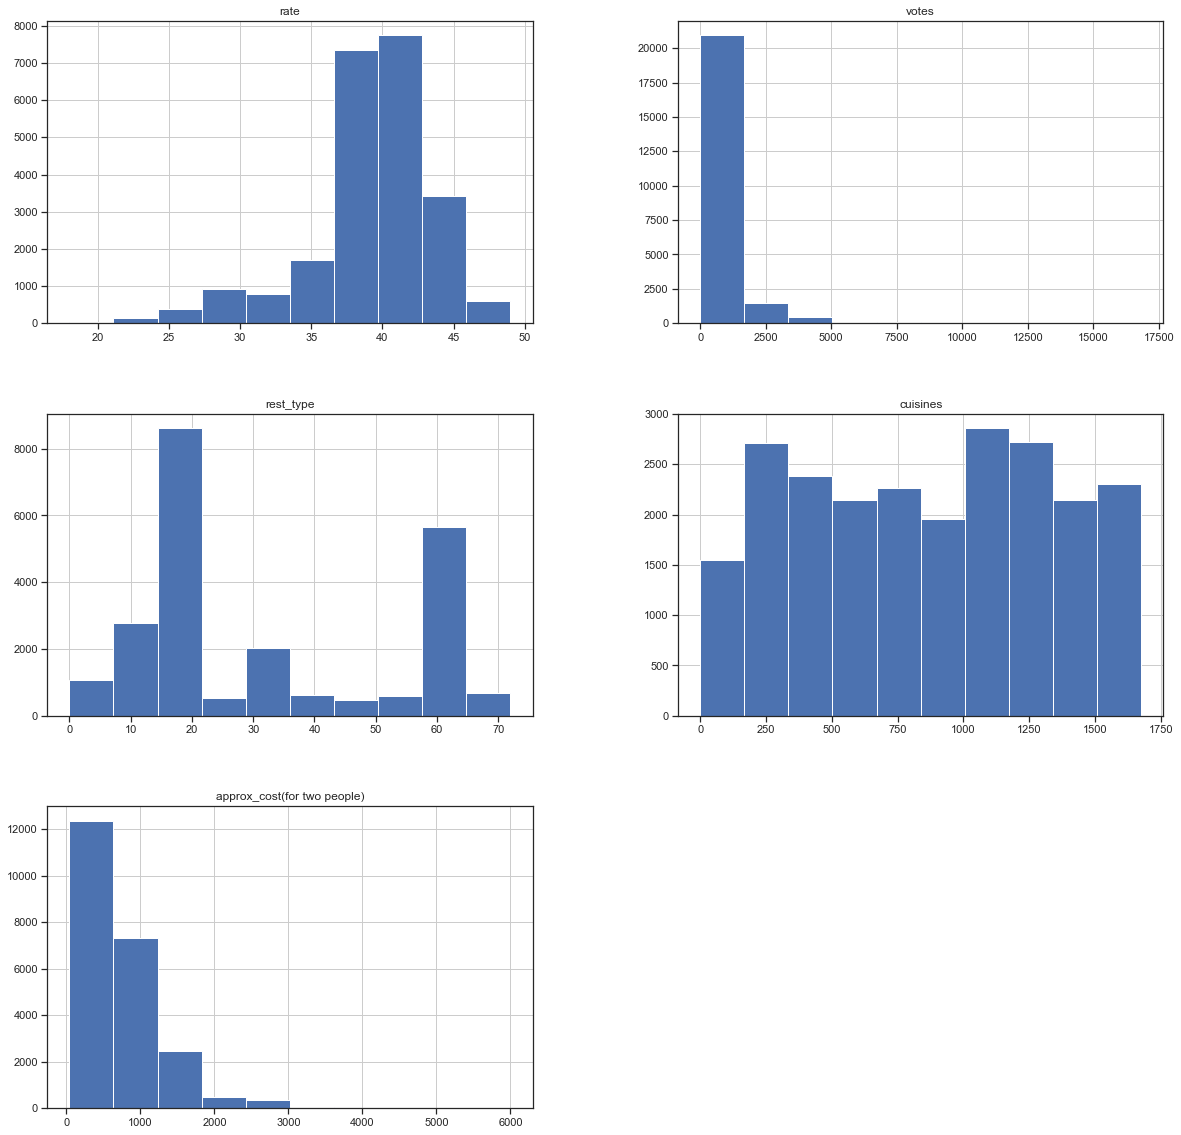

In [33]:
data.hist(figsize=(20,20))
plt.show()

### Исходное распределение

Исходное распределение для признака числового признака `rate`:

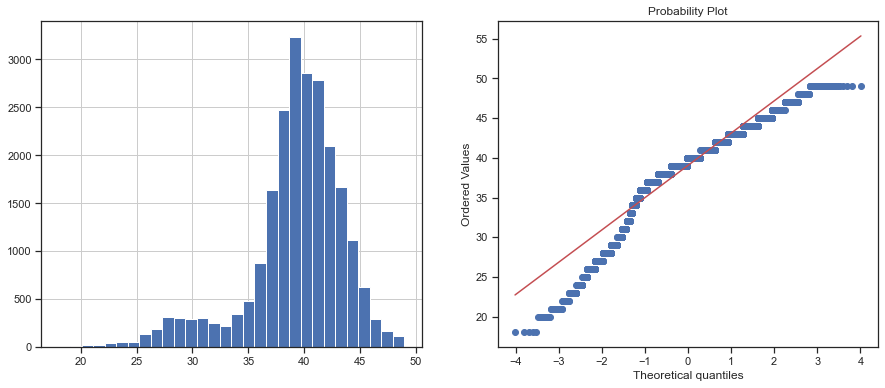

In [34]:
diagnostic_plots(data, 'rate')

### Логарифмическое преобразование

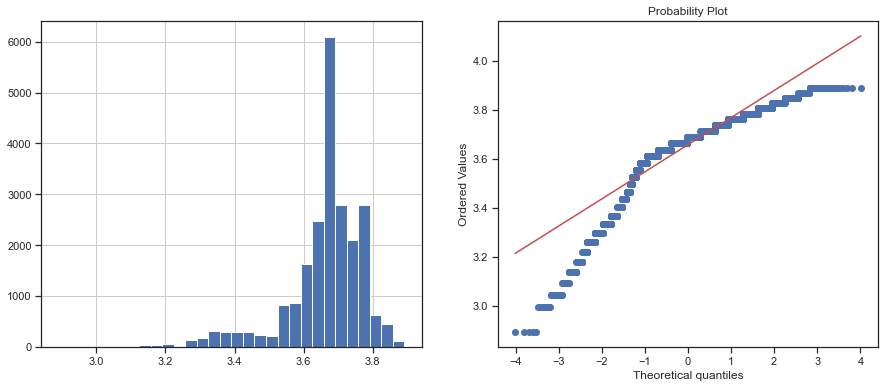

In [36]:
data['rate_log'] = np.log(data['rate'])
diagnostic_plots(data, 'rate_log')

### Обратное преобразование

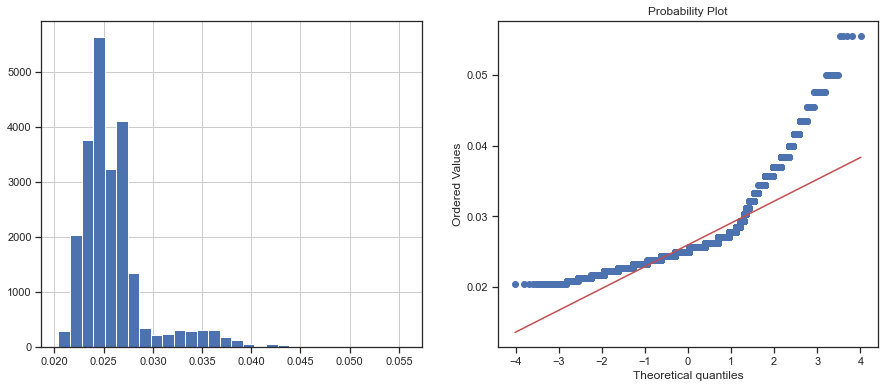

In [37]:
data['rate_reciprocal'] = 1 / (data['rate'])
diagnostic_plots(data, 'rate_reciprocal')

### Преобразование с использованием квадратного корня

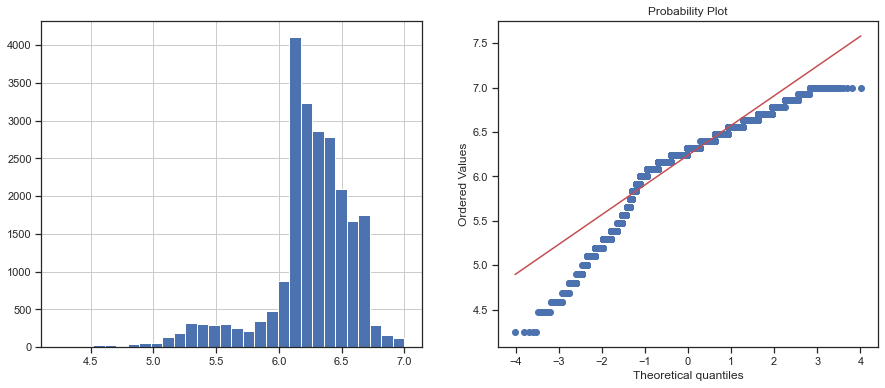

In [38]:
data['rate_sqr'] = data['rate']**(1/2)
diagnostic_plots(data, 'rate_sqr')

### Возведение в степень

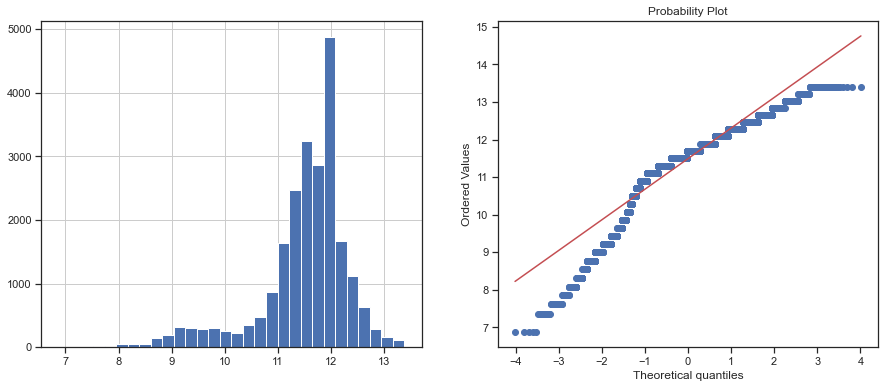

In [39]:
data['rate_exp'] = data['rate']**(1/1.5)
diagnostic_plots(data, 'rate_exp')

### Преобразование Бокса-Кокса

Оптимальное значение λ = 3.886654759008959


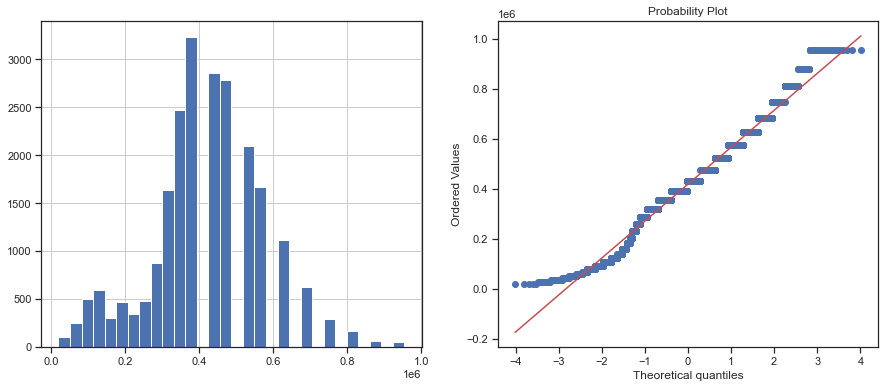

In [40]:
data['rate_cox'], param = stats.boxcox(data['rate'])
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'rate_cox')

### Преобразование Йео-Джонсона

Оптимальное значение λ = 3.966503813106975


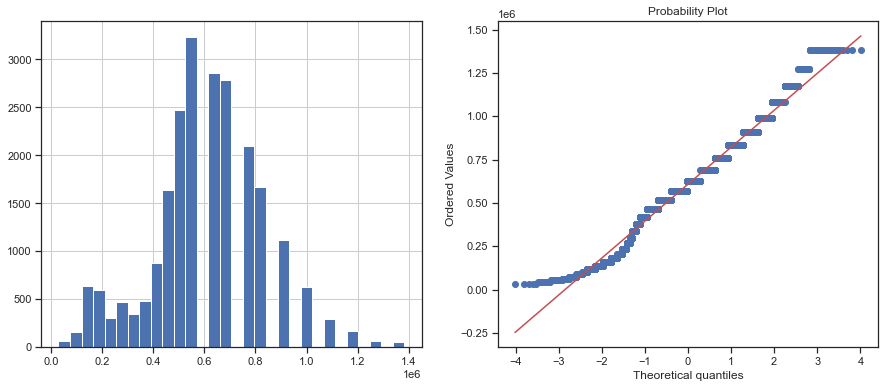

In [41]:
# Необходимо преобразовать данные к действительному типу
data['rate'] = data['rate'].astype('float')
data['rate_yeojohnson'], param = stats.yeojohnson(data['rate'])
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'rate_yeojohnson')